<a href="https://colab.research.google.com/github/Asiri2000/Deep-learning-projects/blob/main/GenAI_activity1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Develop and train a generative model.

## Define Model Scope and Data

### Subtask:
Clarify the specific type of generative model (e.g., GAN, VAE, autoregressive) and the nature of the data (e.g., images, text, time series) you intend to use. This will guide subsequent steps.


### Clarifying Generative Model Type and Data Nature

To move forward, we need to decide on two crucial aspects:

1.  **Generative Model Type**: This refers to the architecture of the generative model you plan to use. Common types include:
    *   **Generative Adversarial Networks (GANs)**: Excellent for generating realistic images, often used in art generation, style transfer, and super-resolution.
    *   **Variational Autoencoders (VAEs)**: Good for learning compressed latent representations, useful for data generation, anomaly detection, and controlled generation (e.g., generating faces with specific attributes).
    *   **Autoregressive Models** (e.g., PixelRNN, WaveNet, GPT variants): Generate data sequentially, often used for text generation, speech synthesis, and image generation pixel by pixel.
    *   **Flow-based Models**: Provide exact likelihood estimation and invertible transformations, useful for high-quality image generation and density estimation.

2.  **Nature of the Data**: This describes the type of data your generative model will be trained on and will generate. Common types include:
    *   **Images**: Datasets like MNIST, CIFAR-10, CelebA for generating visual content.
    *   **Text**: Datasets like Wikipedia articles, books, or specific conversational data for natural language generation.
    *   **Time Series**: Sequential data like stock prices, sensor readings, or audio waveforms.
    *   **Tabular Data**: Structured data often found in databases, which can be used for synthetic data generation or imputation.

Your choice should align with your project goals. For instance, if you want to generate highly realistic images, a GAN might be a strong candidate. If you are interested in exploring the latent space and having more control over the generated features, a VAE could be more suitable.

**Reasoning**:
Based on the instructions, I will now create two Python variables, `model_type` and `data_type`, and assign placeholder string values to them. This will allow the user to easily modify these values to reflect their specific choices.



In [ ]:
model_type = 'GAN'
data_type = 'images'

print(f"Selected Generative Model Type: {model_type}")
print(f"Selected Data Type: {data_type}")

Selected Generative Model Type: GAN
Selected Data Type: images


## Prepare Dataset

### Subtask:
Load and preprocess the dataset relevant to the chosen generative model (GAN) and data type (images). This includes data cleaning, normalization, resizing, and batching.


### Loading and Preprocessing the Dataset

For this task, we will use the **MNIST dataset**, which consists of grayscale images of handwritten digits. It's a commonly used dataset for generative models due to its simplicity and small size, making it suitable for demonstrating GAN capabilities without requiring extensive computational resources.

We will use **TensorFlow** and its `tf.keras.datasets` utility to load the dataset, and `tf.data` for efficient batching and shuffling.

**Reasoning**:
Now, I will implement the loading, preprocessing, and batching of the MNIST dataset using TensorFlow, following the specified instructions.



# Task
Run the code to load and preprocess the MNIST dataset for GAN training.

## Prepare Dataset

### Subtask:
Load and preprocess the MNIST dataset for GAN training. This includes normalizing pixel values, reshaping images, and creating batched TensorFlow datasets.


**Reasoning**:
First, I will import the TensorFlow library, then load the MNIST dataset and preprocess the training images according to the instructions, including reshaping and normalizing pixel values. Finally, I will create a batched and prefetched TensorFlow dataset.



In [ ]:
import tensorflow as tf

# 2. Load the MNIST dataset
(train_images, train_labels), (_, _) = tf.keras.datasets.mnist.load_data()

# 3. Preprocess the train_images
# a. Reshape images to include a channel dimension
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')

# b. Normalize the pixel values from [0, 255] to [-1, 1]
train_images = (train_images - 127.5) / 127.5  # Normalize the images to [-1, 1]

# 4. Define batch size and buffer size
BUFFER_SIZE = train_images.shape[0]
BATCH_SIZE = 256

# 5. Create a tf.data.Dataset
dataset = tf.data.Dataset.from_tensor_slices(train_images)

# 6. Shuffle the dataset
dataset = dataset.shuffle(BUFFER_SIZE)

# 7. Batch the dataset
dataset = dataset.batch(BATCH_SIZE)

# 8. Prefetch the batches
dataset = dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

print(f"Shape of preprocessed training images: {train_images.shape}")
print(f"Pixel value range: [{train_images.min()}, {train_images.max()}]")
print(f"Dataset created with batch size: {BATCH_SIZE}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Shape of preprocessed training images: (60000, 28, 28, 1)
Pixel value range: [-1.0, 1.0]
Dataset created with batch size: 256


## Design GAN Architecture

### Subtask:
Define the Generator and Discriminator models for the GAN. The Generator will create images from noise, and the Discriminator will classify real vs. fake images.


**Reasoning**:
I will define two functions, `make_generator_model` and `make_discriminator_model`, using `tf.keras.Sequential` to construct the respective GAN components as per the instructions, including the specified layers and activation functions.



In [ ]:
import tensorflow as tf

def make_generator_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())

    model.add(tf.keras.layers.Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256) # Note: None is the batch size

    model.add(tf.keras.layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())

    model.add(tf.keras.layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())

    model.add(tf.keras.layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 1)

    return model

def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[28, 28, 1]))
    model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.Dropout(0.3))

    model.add(tf.keras.layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.Dropout(0.3))

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    return model

# Create instances of the models to verify their structure
generator = make_generator_model()
discriminator = make_discriminator_model()

print("Generator Model Summary:")
generator.summary()
print("\nDiscriminator Model Summary:")
discriminator.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Generator Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 12544)          │     1,254,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 12544)          │        50,176 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 7, 7, 128)      │       819,200 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 14, 14, 64)     │       204,800 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 28, 28, 1)      │         1,600 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,330,944 (8.89 MB)

 Trainable params: 2,305,472 (8.79 MB)

 Non-trainable params: 25,472 (99.50 KB)


Discriminator Model Summary:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 14, 14, 64)     │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 7, 7, 128)      │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │         6,273 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 212,865 (831.50 KB)

 Trainable params: 212,865 (831.50 KB)

 Non-trainable params: 0 (0.00 B)

**Reasoning**:
The previous code successfully defined the Generator and Discriminator models. The next logical step is to define the loss functions for both models and the optimizers that will be used during training.



In [ ]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

print("Loss functions and optimizers defined.")

Loss functions and optimizers defined.


## Compile and Train GAN

### Subtask:
Implement the GAN training loop, including defining loss functions (e.g., Binary Cross-Entropy), optimizers, and monitoring metrics. Train the GAN on the prepared MNIST dataset.


**Reasoning**:
I will define the `noise_dim` and `EPOCHS` variables and then create the `train_step` function that encapsulates the core GAN training logic, including noise generation, fake image creation, and loss calculation for both the generator and discriminator, followed by gradient application.



In [ ]:
import os
import time
import matplotlib.pyplot as plt
import numpy as np

# 3. Define the number of EPOCHS and the noise_dim
EPOCHS = 50
noise_dim = 100
num_examples_to_generate = 16

# We will reuse this seed overtime (so it's easier to visualize progress)
seed = tf.random.normal([num_examples_to_generate, noise_dim])

@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return gen_loss, disc_loss

print(f"Noise dimension: {noise_dim}")
print(f"Number of epochs: {EPOCHS}")
print("train_step function defined.")

Noise dimension: 100
Number of epochs: 50
train_step function defined.


**Reasoning**:
I will define the `generate_and_save_images` function to visualize the generator's progress and then implement the main `train` function that orchestrates the GAN training loop over epochs, calling `train_step` for each batch and periodically saving generated images.



Starting GAN training...


/usr/local/lib/python3.12/dist-packages/keras/src/backend/tensorflow/nn.py:789: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


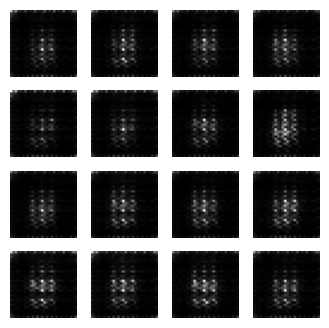

Epoch 1, Time: 562.79s, Generator Loss: 0.6783, Discriminator Loss: 1.1754
Epoch 2, Time: 561.91s, Generator Loss: 0.7439, Discriminator Loss: 1.3349
Epoch 3, Time: 517.45s, Generator Loss: 0.8099, Discriminator Loss: 1.3055
Epoch 4, Time: 521.64s, Generator Loss: 0.8260, Discriminator Loss: 1.2553
Epoch 5, Time: 505.79s, Generator Loss: 0.9271, Discriminator Loss: 1.2150
Epoch 6, Time: 511.14s, Generator Loss: 1.0301, Discriminator Loss: 1.1536
Epoch 7, Time: 513.27s, Generator Loss: 0.9220, Discriminator Loss: 1.2497
Epoch 8, Time: 517.77s, Generator Loss: 0.8640, Discriminator Loss: 1.2637
Epoch 9, Time: 518.63s, Generator Loss: 0.9212, Discriminator Loss: 1.2219


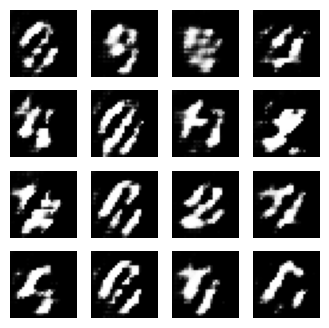

Epoch 10, Time: 517.20s, Generator Loss: 0.9689, Discriminator Loss: 1.1951
Epoch 11, Time: 516.83s, Generator Loss: 0.9195, Discriminator Loss: 1.2473
Epoch 12, Time: 522.31s, Generator Loss: 1.0292, Discriminator Loss: 1.1140
Epoch 13, Time: 518.99s, Generator Loss: 0.9807, Discriminator Loss: 1.2353
Epoch 14, Time: 561.91s, Generator Loss: 1.0041, Discriminator Loss: 1.1534
Epoch 15, Time: 561.91s, Generator Loss: 1.0697, Discriminator Loss: 1.1274
Epoch 16, Time: 561.91s, Generator Loss: 1.1804, Discriminator Loss: 1.0219
Epoch 17, Time: 497.56s, Generator Loss: 1.2497, Discriminator Loss: 1.0192


In [ ]:
def generate_and_save_images(model, epoch, test_input):
    # Notice `training` is set to False. This is so all layers run in inference mode (batchnorm).
    predictions = model(test_input, training=False)
    fig = plt.figure(figsize=(4, 4))

    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
        plt.axis('off')

    plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
    plt.show()

def train(dataset, epochs):
    for epoch in range(epochs):
        start = time.time()

        gen_total_loss = 0.0
        disc_total_loss = 0.0

        for image_batch in dataset:
            gen_loss, disc_loss = train_step(image_batch)
            gen_total_loss += gen_loss
            disc_total_loss += disc_loss

        # Produce images for the GIF as we go
        if (epoch + 1) % 10 == 0 or epoch == 0: # Save images at epoch 0 and every 10 epochs
            generate_and_save_images(generator, epoch + 1, seed)

        # Save the model every 15 epochs
        # if (epoch + 1) % 15 == 0:
        #     checkpoint.save(file_prefix = checkpoint_prefix)

        print(f'Epoch {epoch + 1}, Time: {time.time()-start:.2f}s, Generator Loss: {gen_total_loss/len(dataset):.4f}, Discriminator Loss: {disc_total_loss/len(dataset):.4f}')

# Start training
print('Starting GAN training...')
train(dataset, EPOCHS)
print('GAN training complete.')

**Reasoning**:
The previous warning indicated that `BinaryCrossentropy(from_logits=True)` was used with an output that already had a Sigmoid activation. To fix this, I will modify the `make_discriminator_model` function to remove the Sigmoid activation from its final layer, ensuring it outputs raw logits as expected by the loss function.



In [ ]:
import tensorflow as tf

def make_generator_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())

    model.add(tf.keras.layers.Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256) # Note: None is the batch size

    model.add(tf.keras.layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())

    model.add(tf.keras.layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())

    model.add(tf.keras.layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 1)

    return model

def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[28, 28, 1]))
    model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.Dropout(0.3))

    model.add(tf.keras.layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.Dropout(0.3))

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(1)) # Removed activation='sigmoid' to output logits

    return model

# Create instances of the models to verify their structure
generator = make_generator_model()
discriminator = make_discriminator_model()

print("Generator Model Summary:")
generator.summary()
print("\nDiscriminator Model Summary:")
discriminator.summary()
